# Machine-made Datasets
Authors: Ruslan Mammadov

Copyright (C) 2021 Ruslan Mammadov and DynaGroup i.T. GmbH

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PPDB Dataset

http://paraphrase.org

TLDR:
1. This dataset was created by machine, not by humans => huge, but not always acurate
2. It does not contain sentences, but the syntactic "rules"
3. It can not be used for training, but to augment the data


Long version:
1. Dataset was created automatically using pivoting method (find 2 phrases translated to the same foreign phrase)

In [ ]:
# Let's load small version with the words with the best score!
with open("drive/MyDrive/Paraphrasing API/datasets/Machine Made Datasets/ppdb-2.0-s-all", "r") as file:
  lines = file.readlines()
ppdb_small_version = [item.split(" ||| ") for item in lines]
del lines
print(f"Size of the small (!) version: {len(ppdb_small_version)}")

Size of the small (!) version: 4551746


2. It contains syntaxis rules
  
  It uses part-of-speech tags like VP, NP, etc. The whole list: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
# Example
# 1. The word hast to be VP - verbal phrase,.
# 2. NP/NP - Placeholder for "Noun phrase without Noun phrase"
# 3. Score probability and other features.
# 4. 0-0, 0-1, Positions how can you replace it
# 5. Type of relations: ForwardEntailment - means that right side always mean left side, but left side 
# may not mean the right side
ppdb_small_version[2000000]

['[VP]',
 'to address [NP/NP,1] [NP,2]',
 'deal with [NP/NP,1] [NP,2]',
 'PPDB2.0Score=5.66727 PPDB1.0Score=5.285380 -logp(LHS|e1)=0.30792 -logp(LHS|e2)=0.23248 -logp(e1|LHS)=11.25391 -logp(e1|e2)=2.55238 -logp(e1|e2,LHS)=2.50087 -logp(e2|LHS)=11.75635 -logp(e2|e1)=2.73300 -logp(e2|e1,LHS)=2.69047 AGigaSim=0.61523 Abstract=0 Adjacent=1 CharCountDiff=-1 CharLogCR=-0.08701 ContainsX=0 Equivalence=0.146875 Exclusion=0.154067 GlueRule=0 GoogleNgramSim=0 Identity=0 Independent=0.162137 Lex(e1|e2)=59.95702 Lex(e2|e1)=59.95702 Lexical=0 LogCount=3.98898 MVLSASim=NA Monotonic=1 OtherRelated=0.009753 PhrasePenalty=1 RarityPenalty=0 ForwardEntailment=0.527168 SourceTerminalsButNoTarget=0 SourceWords=2 TargetTerminalsButNoSource=0 TargetWords=2 UnalignedSource=1 UnalignedTarget=1 WordCountDiff=0 WordLenDiff=-0.50000 WordLogCR=0',
 '0-0 1-0 1-1 2-2 3-3',
 'ForwardEntailment\n']

3. There are two types of rules:
   1. Lexical & Phrasal (single/multiword to single/multiword): 
      
      Example: http://paraphrase.org/#/search?q=complete&filter=%5BVP%5D&lang=en
   2. Syntactic (paraphrase rules containing non-terminal symbols (NP, VP, etc.))
      
      Example: http://paraphrase.org/#/search?q=in%20respect%20to&filter=&lang=en

4. Not all rules are good:

  However, you can always choose a rule with better score: http://paraphrase.org/#/search?q=reaffirmed&filter=&lang=en

In [ ]:
# Really equivalence?
ppdb_small_version[3000] # VB - Verb, base form.

['[VB]',
 'reaffirmed',
 'reiterate',
 'PPDB2.0Score=4.18659 PPDB1.0Score=9.814040 -logp(LHS|e1)=5.70920 -logp(LHS|e2)=0.29931 -logp(e1|LHS)=13.76320 -logp(e1|e2)=4.90406 -logp(e1|e2,LHS)=7.54041 -logp(e2|LHS)=8.35922 -logp(e2|e1)=4.90998 -logp(e2|e1,LHS)=2.13643 AGigaSim=0.54532 Abstract=0 Adjacent=0 CharCountDiff=-1 CharLogCR=-0.10536 ContainsX=0 Equivalence=0.405977 Exclusion=0.001277 GlueRule=0 GoogleNgramSim=0 Identity=0 Independent=0.349517 Lex(e1|e2)=62.39058 Lex(e2|e1)=62.39058 Lexical=1 LogCount=1.38629 MVLSASim=NA Monotonic=1 OtherRelated=0.173768 PhrasePenalty=1 RarityPenalty=0 ReverseEntailment=0.069461 SourceTerminalsButNoTarget=0 SourceWords=1 TargetComplexity=0.99694 TargetFormality=1.00000 TargetTerminalsButNoSource=0 TargetWords=1 UnalignedSource=0 UnalignedTarget=0 WordCountDiff=0 WordLenDiff=-1.00000 WordLogCR=0',
 '0-0',
 'Equivalence\n']

### Conclusion
1. You can not use it for training, it is not sentences
2. You can not use it for paraphrasing alone, it is not powerful enough.
3. It is used to augment the data (paraphrasic augmentation):
  1. For human-made datasets, to increase the size by alternating samples using random rules with high scores 
    1. https://direct.mit.edu/tacl/article/doi/10.1162/tacl_a_00380/100783/Iterative-Paraphrastic-Augmentation-with
    2. [NLPAug Library](https://github.com/makcedward/nlpaug) uses PPDB
  2. For machine-made datasets, you can increase the diversity between input and output
    1. Next sections
    2. Also https://aclanthology.org/N19-1090/

# Machine made datasets, improved by PPDB

Two kind of datasets:
1. Human made are small and good
2. Machine made are gigantic and bad

## Parabank 2
https://nlp.jhu.edu/parabank/ -> ParaBank v2.0

TLDR:
1. The best machine made dataset I have found, we can use if we want to train a big model (100 millions samples), but for fine-tuning use human made datasets (better language, more accurate)

Long version:
1. Sentence to sentence
2. Machine made => a lot of samples (100 millions), but worse quality
3. Quite new, 2019, based on previous machine-made dataset with lower diversity
3. The authors concentrated on better diversity
4. Was created by translating to Czech and back
5. Improved the diversity by applying PPDB rules


In [ ]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


10400667it [02:36, 66283.90it/s] 


In [ ]:
# Let's load parabank2.
from tqdm import tqdm

take_first_n = 10000
parabank2_highest_scores = []

read_every_n_line = 1000
parabank2 = []

with open("drive/MyDrive/Paraphrasing API/datasets/Machine Made Datasets/parabank2.tsv", "r") as file:
  for i, line in tqdm(enumerate(file)):
    if i < take_first_n:
      parabank2_highest_scores.append(line.split("\t"))
    if i % read_every_n_line:
      continue
    parabank2.append(line.split("\t"))
print(f"Size of parabank2 sampled every {read_every_n_line} lines is {len(parabank2)}")

10405002it [02:49, 61531.72it/s] 

Size of parabank2 sampled every 1000 line is 10406


Let's look at the samples with best scores

In [ ]:
parabank2_highest_scores[10]  # First 1000 samples are names of organization

['0.9286716938412872',
 '2002 IIHF World U18 Championships',
 '2002 World Ice Hockey Championships',
 '2002 World Ice Hockey Championship in 18 years',
 '2002 IIHF World Cup',
 '2002 World Ice Hockey Championship (IIHF)',
 '2002 World Iced Hockey Championship Championships\n']

In [ ]:
parabank2_highest_scores[500]

['0.8904752232974726',
 'Cooperation with the European Centre for the Development of Vocational Training (Cedefop)',
 'Working with European Centre for the Developing of Vocational Teaching (Cedefop)',
 'Cooperation with the European Cedefop (Cedefop)',
 'Co-operation with Cedefop European Centre for the Development of Vocal Training (CEDEFOP)',
 'Work with the European Center on Vocal Training Development (Cedefop)',
 'Cooperation with Cedefop (European Center for the Developing of Vocational Education)\n']

In [ ]:
parabank2_highest_scores[-5]

['0.8089646975664998',
 'Six to eight men.',
 '6 or 8 men.',
 '6-8 men.',
 'Between 6 and 8 men.',
 '6 to Eight men.',
 "It's 6 to 8 men\n"]

Let's look at samples with low score

In [ ]:
parabank2[1000]

['0.39455371037160114',
 '- The inspection manual has been issued to all Polish fisheries inspectors.',
 '- A guide on inspections was issued to all Polish fisheries inspectors.',
 '- All Polish fish inspectors have been provided with a manual on inspections.',
 '- All Polish fishing inspectors have been given a Manual on inspections.',
 '- All Polish fisheries inspectors have been issued with an inspection manual.',
 '- All Polian fisheries inspectors have been issued a manual concerning inspections.\n']

In [ ]:
parabank2[10000] # Wrong He != She.

['0.08950149051868009',
 "She's got a cousin in the military and she's kind of anxious about it.",
 "He has cousins in the Army, and he's a little worried.",
 "She has a cousin in the Army, And she's just a little bit concerned about it.",
 "He has a cousin in the Army who's a little worried.",
 'He has a cousin in his army and a little worried about that.',
 "He's got an army cousin and he's kind of concerned.\n"]

## Conclusion
The dataset can be used 
1. To train big models that require a lot of data, before finetuning
2. To teach models some basic tricks how to do paraphrasing

The model should **not** be used:
1. For finetuning.
2. As the only training dataset.

#### Another machine made datasets
1. Parabank - Previous version, less diversity.
2. ParaNMT - predecessor, just translation to Czech and back, no PPDB => even less diversity than in Parabank.

# Some other datasets that were not at the list

https://opendata.stackexchange.com/questions/6094/paraphrase-data-sets

TLDR:
1. We can use many labeled semantic evaluations datasets by just filtering out non-paraprases.

Long version:

Multiple semantic evaluations datasets
1. They mostly contain labeled samples of 
  1. Paraphrases vs non-paraphrases, 
  2. Or entailment vs contradictions vs neutral phrases
2. But we can filter out non-paraphrases


1. [Paws](https://github.com/google-research-datasets/paws): Google made, sentence-sentence, 108,463 human-labeled and 656k noisily labeled pairs of paraphreases and non paraphrases.
2. [Microsoft Research Paraphrase Corpus](https://www.microsoft.com/en-us/download/details.aspx?id=52398&from=http%3A%2F%2Fresearch.microsoft.com%2Fen-us%2Fdownloads%2F607d14d9-20cd-47e3-85bc-a2f65cd28042%2F): 5800 pairs of labeled paraphrase and non-paraphrase sentences
3. [SNLI](https://nlp.stanford.edu/projects/snli/): 570k sentence pairs of entailment, contradictions and neutral phrases 
3. SNIPS Alexa commands; MSRP Frames; GYAFC Dataset - have not looked into that
4. **Other datasets for semantic evaluations challenges.**




# Evaluation scores

### Scores based on input-output comparison

https://aclanthology.org/K19-1005/

TLDR: Look at the cool metrics in the next cell.

Long version: Here, I will concentrate on scores based on **input <-> output comparison**, not based on references (which we should use too). Advantages:

1. We can not expect the output to be always similar to reference => reference based metrics may not be always indicative
2. Similarity to the reference depends on data the model trained on => hard to compare models trained on different datasets

### Two kinds of such scores
We want to change the words but keep the meaning. So, we should have 2 kinds of scores:
1. Diversity between output and input
  1. Three kinds: Lexical, phrasal, and Syntactical
2. Adequacy, or semantic similarity (i.e. how similar is meaning)
3. Fluency (Is the paraphrase fluent English?)

## Paraphrasic divesity scores
1. BLEU score, but 
  1. Between output and input, **not reference**.
  2. We are interested in diversity => Higher Bleu = **worse** diversity => worse results
  3. Measures "Phrasal diversity"
2. ∩/∪ or Intersection/Union score
  1. Number of shared words / number of all words.
  2. Higher score = worse diversity
  3. Measures "lexical diversity"
3. Tree ED or Tree edit distance
  1. Syntactic parse sentences into tree
  2. Compute tree distance, i.e. how different are the tree.
  3. Used in https://aclanthology.org/K19-1005/ and in some other papers
  4. Hard to find ready to use implementation
  5. Easy to find implmentations for syntactic parse and tree distance.
  6. (Or we can use nltk's edit_distance, but it is a little bit different)
  7. Measures "syntactic diversity"

Example for syntactic tree:
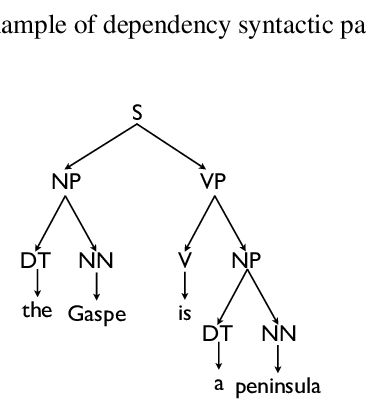

##  Semantic similarity scores
1. Compare sentence embeddings
  1. BERT
  2. BERT finetuned by paraphrases datasets
    1. Example: https://zenodo.org/record/3524708#.YWKuExBBxQI
  2. T5-11B, XLNet, ALBERT, RoBERTa (improvements on/over BERT): 
  https://arxiv.org/pdf/2004.13820.pdf
2. Semantic similiary trained models?


# Fluency
1. Sorry, did not have time to investigate :(. Let's do it next week :)
2. Perplexity?
3. Grammar score?


# Surprise
There are already many paraphrasers online:
1. ["10 Best Paraphrasing Tools (Free & Paid) – 2021"](https://rigorousthemes.com/blog/best-paraphrasing-tools-free-paid/)

Completely free:
2. https://www.prepostseo.com/paraphrasing-tool
3. https://www.editpad.org/tool/paraphrasing-tool
4. https://www.paraphraser.io/

Partly free, which also means that they make buisness with that => resources & full time workers
5. https://quillbot.com/
6. https://www.wordtune.com/

And 
7. 1000s other

What is our task then? Use state of the art techniques? That is what https://www.prepostseo.com/paraphrasing-tool did, and they do not even show Git account or says their names...

# General Approach
1. Use all datasets and evaluation metrics that we can use
  1. One dataset can be used only for evaluation
2. Use several models
  1. Test all the models, find out which performs best according to which criterias
3. As baseline
  1. Pivoting methods (translate to foreign and back)
  2. Online paraphrasers found in internet (we should somehow beat them in order to be valid)
  3. Some already trained paraphrasers
4. Train GPT-3 as reference model
  1. We should be able to get access to GPT-3 for two months
  2. If our model will have the same score as GPT-3, jobe done, we are amazing
  3. If not, we can use GPT-3 to create more samples for our model
  4. We would know what is the best score we can achieve
5. Investigate other models:
  1. Performance on our evaluation metrics, architecture, +/-, etc. The models are:
  2. 38 paraphrase models listed [here on huggingface](https://huggingface.co/models?pipeline_tag=text2text-generation&search=paraphrase) 
  3. [Parrot paraphraser](https://pythonrepo.com/repo/PrithivirajDamodaran-Parrot-python-natural-language-processing)
  4. DNPG model Anna spoke about
7. As one of our model: Finetune existing language generation model (GPT-2, T5, XLNet, etc.) on human-made datasets for paraphrase generation task
  1. Why? We want the model to be able to rephrase any kind of text => The model has to speak english => 
  3. We do not have resources to teach model english from scratch => We have to use tranfer learning
  4. Problem: it is the common approach, which means that is what many people have already done => What new can we bring to the table? Train from scratch? Not enough resourses? Not use deep learning? Probably not so effective?
8. Fit our models (not necessarly GPT-2) every human made dataset except for one used for evaluation
9. If it is not enough, fit it machine made datasets, but before human-made datasets
10. Improve our models using data augmentation & finetune our models on the samples on which it fails
  1. [Data augmentation in nlp](https://towardsdatascience.com/data-augmentation-in-nlp-2801a34dfc28)
  2. [NLPAug Library](https://github.com/makcedward/nlpaug)
  3. [Paraphrase Mining](https://www.sbert.net/examples/applications/paraphrase-mining/README.html)

